# **Heart Disease Analysis**

In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [46]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [47]:
#Extracting CSV dataset from the system using Pandas Library
data=pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [48]:
#All columns in the dataset
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

***There are twelve features in the dataset***

**Age**: The person's age in years

**sex**: The person's (1=male, 0=female)

**ChestpainType**: The chest pain experienced (value 1: typical agina, value 2: atypical agina, value 3: non-aginal pain, value 4: asymptomatic)

**RestingBP**: The person's resting blood pressure ( mm Hg on admission to the hospital)

**Cholestrol**: The person's cholestrol measurement in mg/dl

**FastingBS**: The person's fasting blood sugar (>120 mg/dl, 1=true, 0=false)

**RestingECG**: Resting electrocardiographic measurement (0=normal, 1=having ST-T wave abnormality, 2= showing probable or define left ventricular hypertrophy by Estes' criteria)

**MaxHR**: The person's maximum heart rate achieved

**ExerciseAngina**: Excersice included agina (1=yes,0=no)

**Oldpeak**:ST-depression induced by exercise relative to rest

**ST_Slope**: The slope of the peak excersies ST segment (Value 1: upstoping Value 2: flat, Value 3:downstoping)

**HeartDisease**: Heart Disease (1=yes, 0=no)


In [49]:
#Checking Null Values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

***There are NO MISSING values in our dataset***

# **Percentage of people having Heart Disease**

In [50]:
HeartDisease=data.groupby('HeartDisease').size()
HeartDisease

HeartDisease
0    410
1    508
dtype: int64

In [51]:
#Converting Numerical data into Categorical data
def status(row):
  if row==0:
    return 'Absence'
  if row==1:
    return 'Presence'


In [52]:
#Applying the converted data into our dataset with new column - HeartDisease_Status
data['HeartDisease_Status']=data['HeartDisease'].apply(status)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartDisease_Status
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Absence
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Presence
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Absence
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Presence
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Absence


In [53]:
hd=data.groupby('HeartDisease_Status')['HeartDisease'].count()
hd

HeartDisease_Status
Absence     410
Presence    508
Name: HeartDisease, dtype: int64

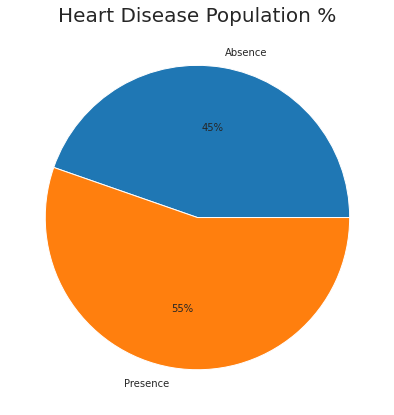

In [54]:
#Pie chart creation of Heart Disease Population % using Matplotlib
plt.figure(figsize=(10,7))
plt.pie(hd,labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

***From the overall population, people having heart disease(55%) are more than those of people who do not have heart disease(45%)***

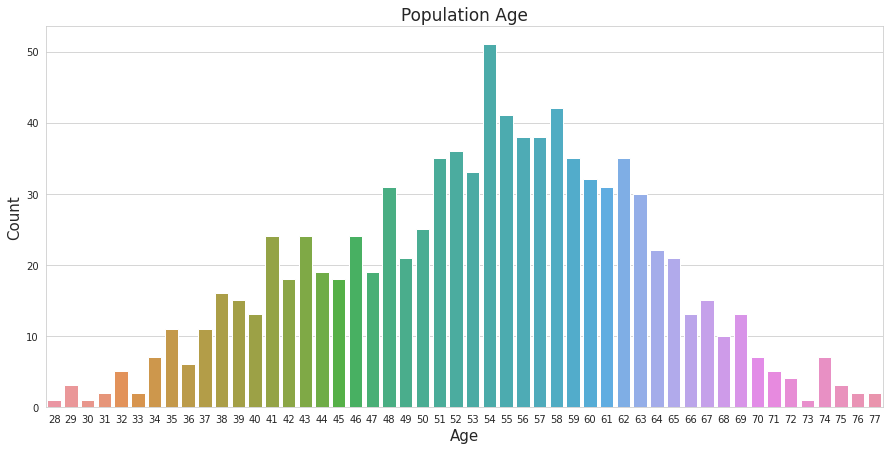

In [55]:
#CountPlot creation of Population Age using Matplotlib and Seaborn
plt.figure(figsize=(15,7))
sns.countplot(x='Age', data=data)
plt.title('Population Age' , fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

***In this section, the best analysis can be devided into elderly, middle-aged, young people by loooking at the age ranges.***

In [56]:
#Statiscal Analysis
Min_Age=data['Age'].min()
Max_Age=data['Age'].max()
Mean_Age=data['Age'].mean()
print("Minimum Age = ", Min_Age)
print("Maximum Age = ", Max_Age)
print("Mean Age = ", Mean_Age)

Minimum Age =  28
Maximum Age =  77
Mean Age =  53.510893246187365


In [57]:
#Categorical Analysis
Young_Ages=data[(data['Age']>=28) & (data['Age']<40)]
Middle_Ages=data[(data['Age']>=40) & (data['Age']<=55)]
Elderly_Ages=data[(data['Age']>55)]
print("Young Ages = ",len(Young_Ages))
print("Middle Ages = ",len(Middle_Ages))
print("Elderly Ages = ",len(Elderly_Ages))

Young Ages =  80
Middle Ages =  432
Elderly Ages =  406


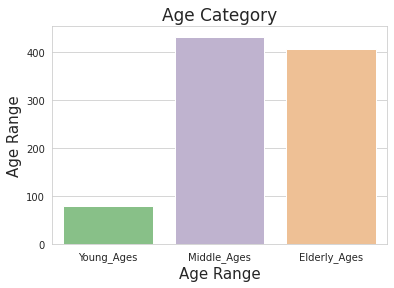

In [58]:
#Bar Plot Creation of Age Category using MatPlotLib and Seaborn
sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='Accent')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Age Range', fontsize=15)
plt.show()

In [59]:
#Converting Numerical Data into Categorical Data
def age_range(row):
  if row>=29 and row<40:
    return 'Young Age'
  elif row>=40 and row<=55:
    return 'Middle Age'
  elif row>55:
    return 'Elderly Age'


In [60]:
#Applying converted data into our dataset with new column- Age_Range
data['Age_Range']=data['Age'].apply(age_range)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartDisease_Status,Age_Range
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Absence,Middle Age
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Presence,Middle Age
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Absence,Young Age
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Presence,Middle Age
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Absence,Middle Age


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


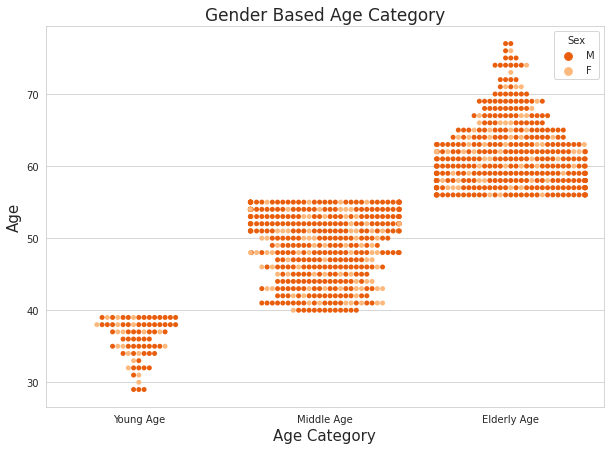

In [61]:
#Swarm Plot Creation of Gender based Age Category using MatPlotLib and Seaborn
plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='Age', hue='Sex', data=data, order=['Young Age','Middle Age','Elderly Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

***In our population, Number of Males are more than the Females in all Age Categories***

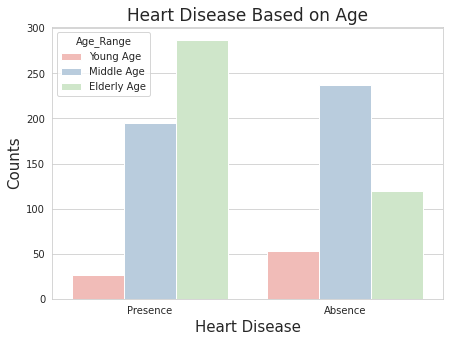

In [62]:
#Count Plot Creation of Heart Disease based on Age using MatPlotLib and Seaborn
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elderly Age']
sns.countplot(x='HeartDisease_Status', hue='Age_Range', data=data, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based on Age', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()


***->Elderly Age people are most affected by heart disease AND Middle Age people are mostly FREE from any kind of Heart Disease***

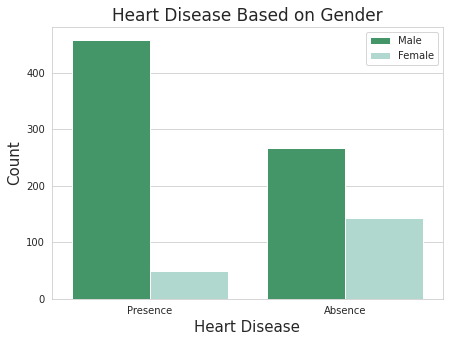

In [63]:
#Count Plot creation for Heart Disease based on Gender using MatPlotLib and Seaborn
plt.figure(figsize=(7,5))
sns.countplot(x=data['HeartDisease_Status'], hue='Sex', data=data, order=['Presence','Absence'], palette='BuGn_r')
plt.title('Heart Disease Based on Gender', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(labels=['Male','Female'])
plt.show()

***->We can see that Males are more prone to Heart Disease***

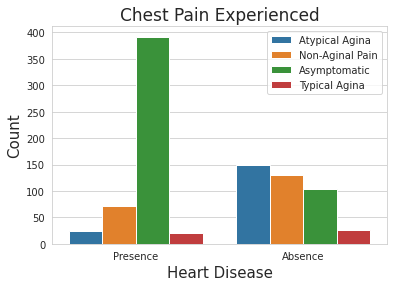

In [64]:
#Count Plot Creation of Chest Pain Experienced using MatPlotLib and Seaborn
sns.countplot(x=data['HeartDisease_Status'], hue='ChestPainType', data=data, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(labels=['Atypical Agina','Non-Aginal Pain','Asymptomatic','Typical Agina'])
plt.show()

***->It seems that having Asymptomatic chest pain have a higher chance of heart disease.***

***->Asymptomatic chest pain means neither causing or exhibiting symptoms of heart disease.***

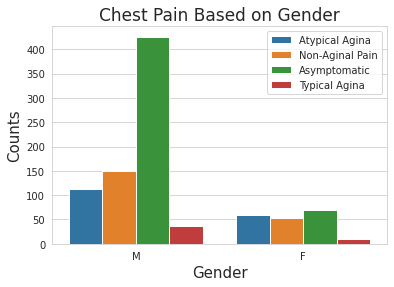

In [65]:
#Count Plot creation for Chest Pain based on Gender using MatPlotLib and Seaborn
sns.countplot(x=data['Sex'], hue='ChestPainType', data=data)
plt.title('Chest Pain Based on Gender', fontsize=17)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Atypical Agina','Non-Aginal Pain','Asymptomatic','Typical Agina'])
plt.show()

***->We see that high number of men are suffering from Asymptomatic chest pain***

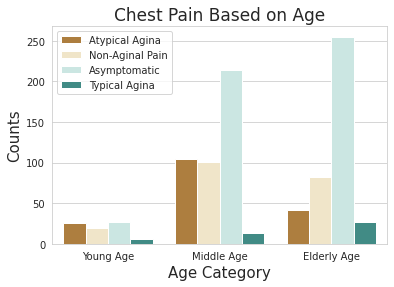

In [66]:
#Count Plot Creation of Chest Pain based on Age using MatPlotLib and Seaborn
sns.countplot(x=data['Age_Range'], hue='ChestPainType', data=data, order=['Young Age','Middle Age','Elderly Age'], palette='BrBG')
plt.title('Chest Pain Based on Age', fontsize=17)
plt.xlabel('Age Category',fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Atypical Agina','Non-Aginal Pain','Asymptomatic','Typical Agina'])
plt.show()

***->There is very high number of Asymptomatic Pain in Elderly Age Catogary***

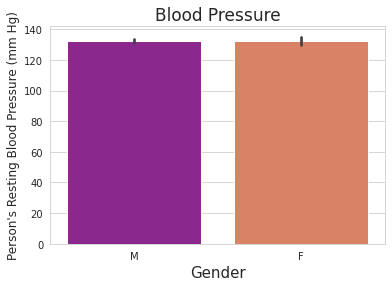

In [67]:
#Bar Plot creation of Person's Resting Blood Pressure (mm Hg) using MatPlotLib and Seaborn
sns.barplot(x='Sex', y='RestingBP', data=data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)",fontsize=12)
plt.show()

***->The Blood Pressure rate is almost equal in Males and Females***

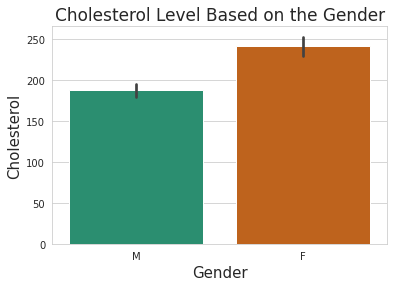

In [68]:
#Bar Plot creation of Cholesterol level based on the Gender using MatPlotLib and Seaborn
sns.barplot(x='Sex', y='Cholesterol', data=data, palette='Dark2')
plt.title("Cholesterol Level Based on the Gender", fontsize=17)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("Cholesterol",fontsize=15)
plt.show()

***->We can observe that, in our population Females have higher Cholestrol than Males***

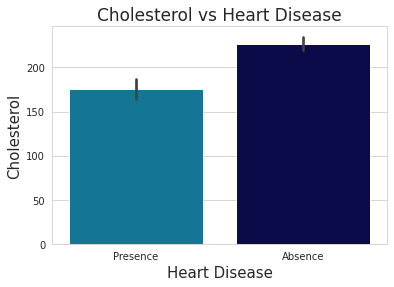

In [69]:
#Bar Plot creation of Cholesterol vs Heart Disease using MatPlotLib and Seaborn
sns.barplot(x='HeartDisease_Status', y='Cholesterol', data=data, order=['Presence','Absence'], palette='ocean_r')
plt.title("Cholesterol vs Heart Disease", fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel("Cholesterol",fontsize=15)
plt.show()

***->Higher Cholestrol level results in the chances of Heart Disease***

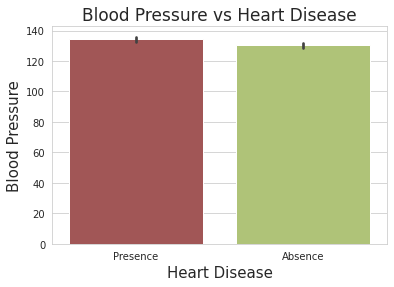

In [70]:
#Bar Plot creation of Blood Pressure vs Heart Disease using MatPlotLib and Seaborn
sns.barplot(x='HeartDisease_Status', y='RestingBP', data=data, order=['Presence','Absence'], palette='tab20b_r')
plt.title("Blood Pressure vs Heart Disease", fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel("Blood Pressure",fontsize=15)
plt.show()

***->Higher Blood Pressure Level results in the chances of Heart Disease***

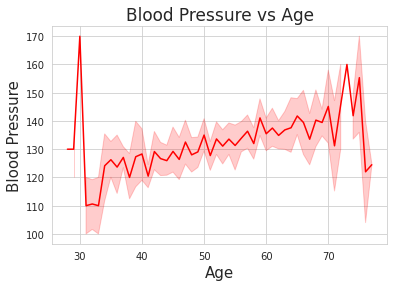

In [71]:
#Line Plot creation of Blood Pressure vs Age using MatPlotLib and Seaborn
sns.lineplot(x='Age', y='RestingBP', data=data, color='r')
plt.title("Blood Pressure vs Age", fontsize=17)
plt.xlabel('Age',fontsize=15)
plt.ylabel("Blood Pressure",fontsize=15)
plt.show()

***->Here we can observe that the blood pressure increases between the age of 40 to 60 and somehow continue the pattern till 70***

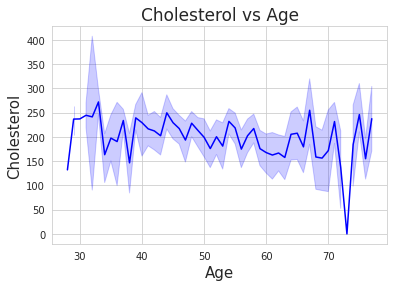

In [72]:
#Line Plot creation of Cholesterol vs Age using MatPlotLib and Seaborn
sns.lineplot(x='Age', y='Cholesterol', data=data, color='b')
plt.title("Cholesterol vs Age", fontsize=17)
plt.xlabel('Age',fontsize=15)
plt.ylabel("Cholesterol",fontsize=15)
plt.show()

***->Similarly, Cholesterol increases in the age group of 50-60***

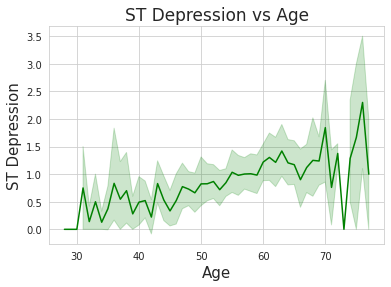

In [73]:
#Line Plot creation of ST Depression vs Age using MatPlotLib and Seaborn
sns.lineplot(x='Age', y='Oldpeak', data=data, color='g')
plt.title("ST Depression vs Age", fontsize=17)
plt.xlabel('Age',fontsize=15)
plt.ylabel("ST Depression",fontsize=15)
plt.show()

***->We can observe from here thet ST depression increases between the age group of 40-60***

***->ST depression refers to a finding on an electrocardiogram.***

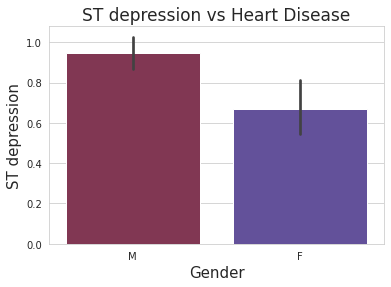

In [74]:
#Bar Plot creation of ST depression vs Heart Disease using MatPlotLib and Seaborn
sns.barplot(x='Sex', y='Oldpeak', data=data, palette='twilight_r')
plt.title("ST depression vs Heart Disease", fontsize=17)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("ST depression",fontsize=15)
plt.show()

***->Males are more prone to ST depression as compare to Females***

In [75]:
#Converting Categorical data into Numerical data
def Angina(row):
  if row=='N':
    return 0
  if row=='Y':
    return 1

In [76]:
#Applying converted data into our dataset with new column- ExerciseAngina_Status
data['ExerciseAngina_Status']=data['ExerciseAngina'].apply(Angina)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartDisease_Status,Age_Range,ExerciseAngina_Status
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Absence,Middle Age,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Presence,Middle Age,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Absence,Young Age,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Presence,Middle Age,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Absence,Middle Age,0


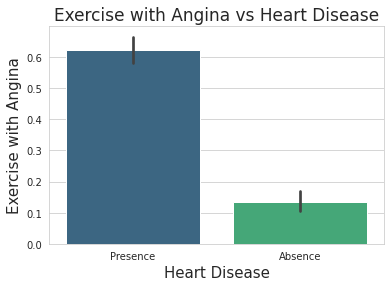

In [77]:
#Bar Plot creation of Exercise with Angina vs Heart Disease using MatPlotLib and Seaborn
sns.barplot(x='HeartDisease_Status', y='ExerciseAngina_Status', data=data, order=['Presence','Absence'], palette='viridis')
plt.title("Exercise with Angina vs Heart Disease", fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel("Exercise with Angina",fontsize=15)
plt.show()

***->If you suffer from Agina, you may be concerned that exercise will make your symptoms worse.***

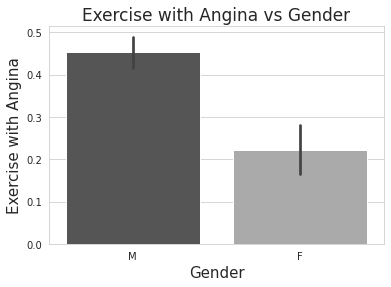

In [78]:
#Bar Plot creation of Exercise with Angina vs Gender using MatPlotLib and Seaborn
sns.barplot(x='Sex', y='ExerciseAngina_Status', data=data, palette='binary_r')
plt.title("Exercise with Angina vs Gender", fontsize=17)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("Exercise with Angina",fontsize=15)
plt.show()

***->Males have high Exercise Agina***

***->A type of chest pain caused by reduced blood flow to the heart***

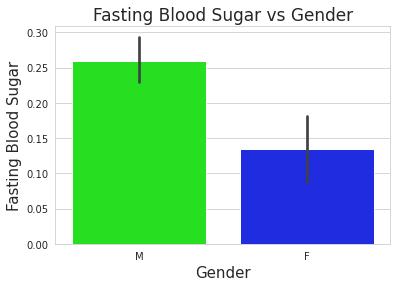

In [79]:
#Bar Plot creation of Fasting Blood Sugar vs Gender using MatPlotLib and Seaborn
sns.barplot(x='Sex', y='FastingBS', data=data, palette='hsv')
plt.title("Fasting Blood Sugar vs Gender", fontsize=17)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("Fasting Blood Sugar",fontsize=15)
plt.show()

***->Males have high no of Fasting Blood Sugar***

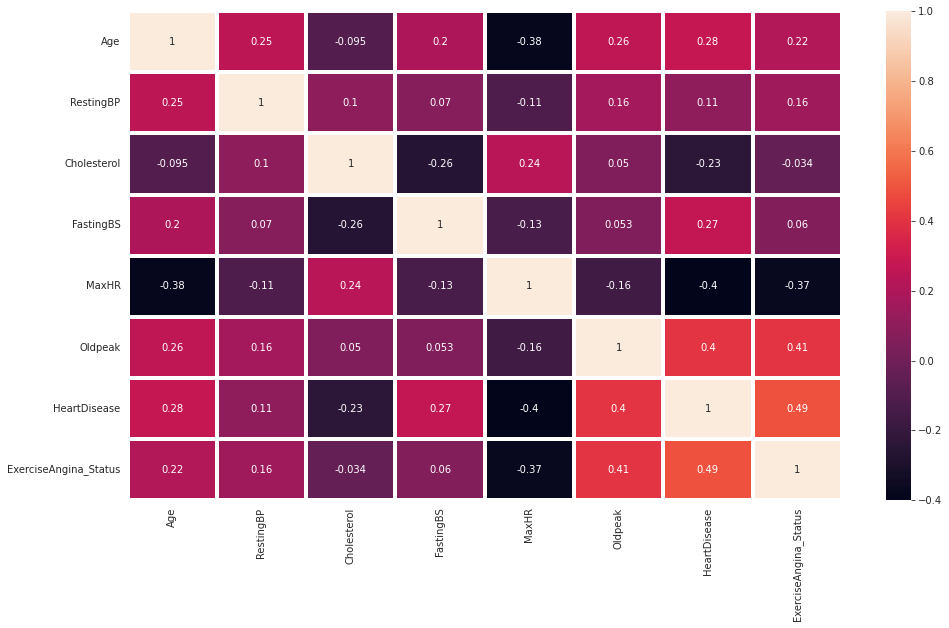

In [80]:
#Heatmap creation using seaborn
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidth=3)